# Cargar Iris Dataset

In [2]:
# Import iris dataset from sklearn
from sklearn.datasets import load_iris
# Store iris dataset
iris_dataset = load_iris()

In [3]:
iris_x_features = iris_dataset.data
iris_y_target = iris_dataset.target
print(iris_x_features.shape)
print(iris_y_target.shape)

(150, 4)
(150,)


# Split iris dataset into train and test data

In [4]:
# Import sklearn train test split to split iris dataset into train and test datasets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(iris_x_features,iris_y_target,test_size = 0.3)

In [5]:
# Train and test datasets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = LinearSegmentedColormap.from_list("5555FF", ['#FF5555', '#5555FF'])
cmap_pastel = LinearSegmentedColormap.from_list("5555FF", ['#FF8888', '#8888FF'])
def plot_classification(features, target, classifier=None, probabilities=False, header=None):
    classes = list(set(target))
    classes = {class_: classes.index(class_) for class_ in classes}
    targetids = [classes[class_] for class_ in target]
    X = np.array(features)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xh = (x_max - x_min) / 250.0
    yh = (y_max - y_min) / 250.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xh),
                         np.arange(y_min, y_max, yh))
    if header:
        title(header, fontsize=24)
    if classifier is not None:
        if not probabilities:
            Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = numpy.array([classes[class_] for class_ in Z])
        elif hasattr(classifier, "decision_function"):
            Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = numpy.array([1 - p for p in Z])
        else:
            Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = np.array([1 - p for p in Z])
        Z = Z.reshape(xx.shape)
        if probabilities:
            pcolormesh(xx, yy, Z, cmap=cmap_light)
        else:
            pcolormesh(xx, yy, Z, cmap=cmap_pastel)
        score = classifier.score(features, target) * 100
        score = ('Accuracy %.2f%%' % score).lstrip('0')
        text(xx.max() - 1, yy.min() + 4, score,
                size=15, horizontalalignment='right')
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=targetids, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

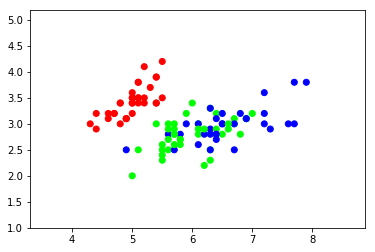

In [7]:
plot_classification(x_train, y_train)

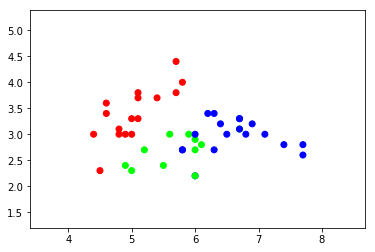

In [8]:
plot_classification(x_test, y_test)

# Clasificador *k*-Nearest Neighbors

In [9]:
# Import knn classifer from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 4)

# Entrenar el modelo con el dataset de datos de entrenamiento

In [10]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

# Predicción de categorías

In [11]:
result = knn_classifier.predict([[3, 5, 4, 2]])
print(iris_dataset.target_names[result])

['versicolor']


In [12]:
print(x_test[0])
result = knn_classifier.predict(x_test[0])
print(iris_dataset.target_names[result])

print(x_test[1])
result = knn_classifier.predict(x_test[1])
print(iris_dataset.target_names[result])

print(x_test[2])
result = knn_classifier.predict(x_test[2])
print(iris_dataset.target_names[result])

print(x_test[10])
result = knn_classifier.predict(x_test[10])
print(iris_dataset.target_names[result])

[ 4.9  2.4  3.3  1. ]
['versicolor']
[ 6.7  3.1  4.4  1.4]
['versicolor']
[ 6.7  3.3  5.7  2.5]
['virginica']
[ 6.5  3.   5.8  2.2]
['virginica']


/home/jmoc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/jmoc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/jmoc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

# Rendimiento sobre datos de entrenamiento

In [13]:
# import sklearn metrics to know the accuracy of model
from sklearn import metrics
train_target_predictions = knn_classifier.predict(x_train)
print(metrics.accuracy_score(y_train,train_target_predictions))

0.980952380952


# Rendimiento sobre datos de test

In [14]:
test_target_predictions = knn_classifier.predict(x_test)
print(metrics.accuracy_score(y_test,test_target_predictions))

0.955555555556


# Metricas y coeficientes de rendimiento sobre datos train

In [15]:
#informe de clasificación
from sklearn.metrics import accuracy_score, classification_report
target_names = iris_dataset.target_names
print(classification_report(y_train, train_target_predictions, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        34
 versicolor       0.97      0.97      0.97        39
  virginica       0.97      0.97      0.97        32

avg / total       0.98      0.98      0.98       105



# Metricas y coeficientes de rendimiento sobre datos test

In [16]:
#informe de clasificación
from sklearn.metrics import accuracy_score, classification_report
target_names = iris_dataset.target_names
print(classification_report(y_test, test_target_predictions, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.91      0.91      0.91        11
  virginica       0.94      0.94      0.94        18

avg / total       0.96      0.96      0.96        45



### kneighbors=15

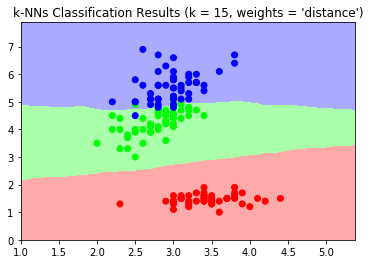

In [17]:
k=15

k1 = KNeighborsClassifie(n_neighbors=k,weights='distance')

#tomamos las 2 primeras caracteristicas
X = iris_dataset.data[:, 0:2]

#tomamos las 2 ultimas caracteristicas
X = iris_dataset.data[:,1:3]

y = iris_dataset.target


#entrenar los datos
k1.fit(X,y)
    
#definir la malla
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) 

#realizar la prediccion
knn_preds = k1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
knn_preds = knn_preds.reshape(xx.shape)

#colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#dibujar la superficie de decision
plt.figure()
plt.pcolormesh(xx, yy, knn_preds, cmap=cmap_light,
               vmin=knn_preds.min(), vmax=knn_preds.max())

#dibujar los puntos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NNs Classification Results (k = %i, weights = '%s')" % (k, 'distance'))

plt.show()